In [1]:
%config IPCompleter.greedy=True
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [2]:
img_path = '.\image_tests\output1.jpg'
img = cv2.imread(img_path, 1)
img_orig = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h,w = img.shape
# plt.rcParams['figure.figsize'] = (16,9)
# plt.imshow(img, cmap='gray')

# blurr the image
img = cv2.GaussianBlur(img, (5,5), 8)
# plt.rcParams['figure.figsize'] = (16,9)
# plt.imshow(img, cmap='gray')

In [3]:
ratio = 120 / w

In [4]:
all_circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.1, 100, param1 = 20, param2= 10, minRadius = 115, maxRadius = 120)
all_circles_rounded = np.uint16(np.around(all_circles))

print (all_circles_rounded)
# print (all_circles_rounded.shape)
print ('It found ' + str(all_circles_rounded.shape[1]) + ' circles on the pi&d')

[[[ 5908  2372   119]
  [ 1782  2396   119]
  [11518  1714   119]
  [10990  8508   119]
  [ 1682  6598   119]
  [ 1330  5994   119]
  [14008  8508   119]
  [ 8116  2372   119]
  [12070  6396   119]
  [11286  9666   119]
  [ 3644  6798   119]
  [ 5026  6396   119]
  [ 6562  1158   119]
  [ 9858  6396   119]
  [10334  2372   119]
  [ 1858  3378   119]
  [ 7266  2372   119]
  [ 9278  7854   119]
  [ 9378  8410   119]
  [ 2132  8502   119]
  [ 2838  2372   119]
  [ 3216  6396   119]
  [ 7644  6392   119]
  [ 8774  8510   119]
  [ 9378  2674   119]
  [10586  7598   119]
  [ 2234  2372   119]
  [ 7060  7854   119]
  [ 8776  1164   119]
  [10284  6800   119]
  [13204  4384   119]
  [ 1430  2768   119]
  [ 4040  2372   119]
  [ 7166  2672   119]
  [12550  2744   119]
  [ 1022  3378   119]
  [ 2732  8406   119]
  [ 3342  8404   119]
  [ 8122  2742   119]
  [ 8372  7598   119]
  [11588  8404   119]
  [13902  3378   119]
  [ 9480  2372   119]
  [11492  7850   119]
  [11664  6396   119]
  [11694  

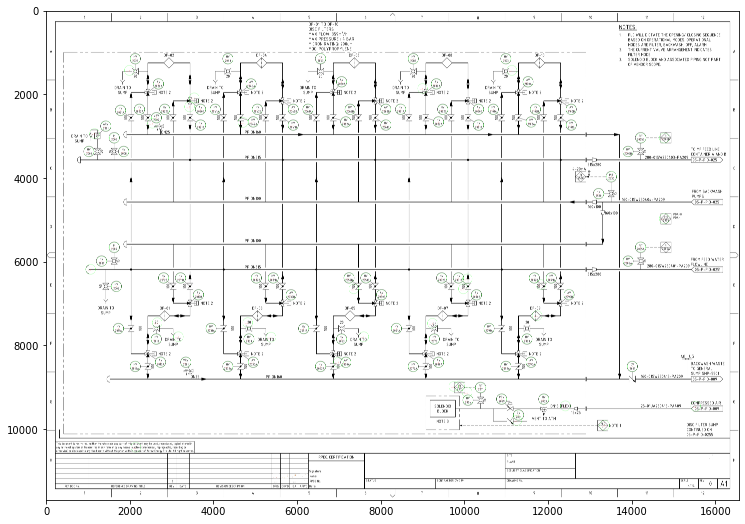

In [5]:
count = 1
img_circles = img_orig.copy()
for i in all_circles_rounded[0]:
    cv2.circle(img_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(img_circles, (i[0], i[1]),2, (255, 0, 0), 3)
    cv2.putText(img_circles, 'Circle ' + str(count), (i[0]-70, i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
    count += 1

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img_circles)
plt.imsave(fname='img_output.jpg', arr=img_circles)

In [81]:
# OCR
import re

cropped_imgs = []
cropped_imgs_txt = []

img_circle_txt = img_orig.copy()

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\diego.giraldo\AppData\Local\Tesseract-OCR\Tesseract.exe'

for idx, i in enumerate(all_circles_rounded[0]):
    radius = np.uint16(i[2]*.75)
    cropped_img_lower = img_circle_txt[i[1]:i[1]+radius,i[0]-radius:i[0]+radius]
    cropped_img_upper = img_circle_txt[i[1]-radius:i[1],i[0]-radius:i[0]+radius]
#     cropped_img = cv2.threshold(cropped_img, 100, 255, cv2.THRESH_BINARY)
    cropped_imgs.append(np.append(cropped_img_upper,cropped_img_lower, axis=0))
    
    upper = pytesseract.image_to_string(cropped_img_upper, lang='eng', config = '--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    lower = pytesseract.image_to_string(cropped_img_lower, config='--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    
    r_upper = re.compile(r'[A-Z]+')
    r_lower = re.compile(r'[A-Z0-9]+')
    
    if r_upper.match(str(upper)).group(0) is not None:
        up = r_upper.match(str(upper)).group(0)
    
    if r_lower.match(str(lower)).group(0) is not None:
        low = r_lower.match(str(lower)).group(0)
    
    cropped_imgs_txt.append(up+'-'+low)

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cropped_imgs[0])
# img_tess = cv2.cvtColor(cropped_imgs[0], cv2.COLOR_BGR2RGB)

AttributeError: 'NoneType' object has no attribute 'group'

In [79]:
cropped_imgs_txt

['AV-2040B', 'HV-2021A', 'AV-2100A', 'HV-2092A', 'HV-2002']

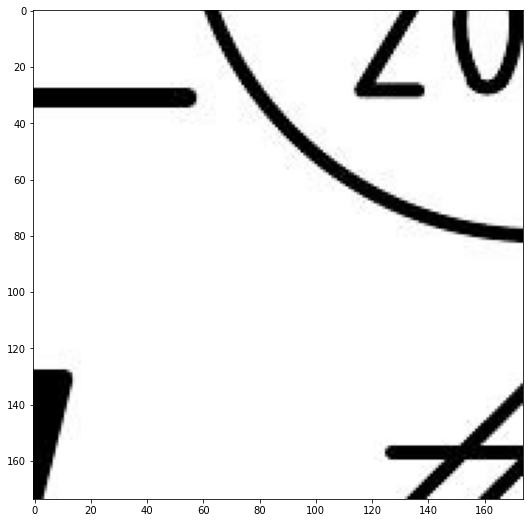

In [69]:
plt.imshow(cropped_imgs[102])

In [ ]:
import re

r = re.compile(r'.+(\n\x0x)-[A-Z0-9]+()')

In [ ]:
# print(pytesseract.image_to_string(cv2.imread('text_test.jpg')))
# img_box_txt = '.\images_tests\pid_box_test.png'
# print(pytesseract.image_to_string(cv2.imread(img_box_txt)))